<a href="https://colab.research.google.com/github/SelinErcan/DataMining/blob/main/Predicting_Online_News_Popularity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting Online News Popularity

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.metrics import accuracy_score, average_precision_score,f1_score
from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_auc_score, roc_curve
from sklearn import metrics
import time

from random import seed
from random import randrange
from csv import reader
%matplotlib inline

## Load Dataset

In [ ]:
csv_filename="OnlineNewsPopularity.csv"

df=pd.read_csv(csv_filename)
df=df[df.columns]

In [ ]:
df.head(10)

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731,12,219,0.663594,1.0,0.815385,4,2,1,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731,9,255,0.604743,1.0,0.791946,3,1,1,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731,9,211,0.575130,1.0,0.663866,3,1,1,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731,9,531,0.503788,1.0,0.665635,9,0,1,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731,13,1072,0.415646,1.0,0.540890,19,19,20,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505
5,http://mashable.com/2013/01/07/beewi-smart-toys/,731,10,370,0.559889,1.0,0.698198,2,2,0,...,0.136364,0.6,-0.195000,-0.400,-0.100000,0.642857,0.214286,0.142857,0.214286,855
6,http://mashable.com/2013/01/07/bodymedia-armba...,731,8,960,0.418163,1.0,0.549834,21,20,20,...,0.100000,1.0,-0.224479,-0.500,-0.050000,0.000000,0.000000,0.500000,0.000000,556
7,http://mashable.com/2013/01/07/canon-poweshot-n/,731,12,989,0.433574,1.0,0.572108,20,20,20,...,0.100000,1.0,-0.242778,-0.500,-0.050000,1.000000,0.500000,0.500000,0.500000,891
8,http://mashable.com/2013/01/07/car-of-the-futu...,731,11,97,0.670103,1.0,0.836735,2,0,0,...,0.400000,0.8,-0.125000,-0.125,-0.125000,0.125000,0.000000,0.375000,0.000000,3600
9,http://mashable.com/2013/01/07/chuck-hagel-web...,731,10,231,0.636364,1.0,0.797101,4,1,1,...,0.100000,0.5,-0.238095,-0.500,-0.100000,0.000000,0.000000,0.500000,0.000000,710


## Normalize Numerical Data

In [ ]:
X_normalized = df.drop(['url',df.keys()[1],df.keys()[-1]], axis=1)

In [ ]:
# Normalize the numerical features
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
numerical = ['n_tokens_title', 'n_tokens_content', 'num_hrefs', 'num_self_hrefs', 'num_imgs','num_videos',\
            'average_token_length','num_keywords','self_reference_min_shares','self_reference_max_shares',\
             'self_reference_avg_sharess']
X_normalized[numerical] = scaler.fit_transform(df[numerical])
display(X_normalized.head(n = 5))

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
0,0.476190,0.025844,0.663594,1.0,0.815385,0.013158,0.017241,0.007812,0.0,0.582024,...,0.378636,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500
1,0.333333,0.030092,0.604743,1.0,0.791946,0.009868,0.008621,0.007812,0.0,0.611043,...,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000
2,0.333333,0.024900,0.575130,1.0,0.663866,0.009868,0.008621,0.007812,0.0,0.546334,...,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000
3,0.333333,0.062662,0.503788,1.0,0.665635,0.029605,0.000000,0.007812,0.0,0.547768,...,0.385965,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000
4,0.523810,0.126505,0.415646,1.0,0.540890,0.062500,0.163793,0.156250,0.0,0.582331,...,0.411127,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364


## Plot ROC


In [ ]:
def plot_ROC(clf, X_test, y_test):
    probs = clf.predict_proba(X_test)
    preds = probs[:,1]
    fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
    roc_auc = metrics.auc(fpr, tpr)

    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

## PCA


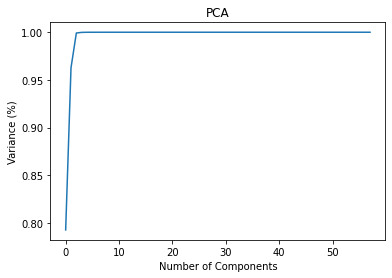

In [ ]:
# PCA
import matplotlib.pyplot as pl
from IPython import get_ipython
from sklearn.decomposition import PCA
pca = PCA().fit(X_normalized)
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('PCA')
plt.show()

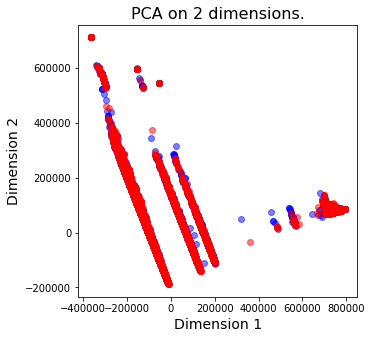

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_normalized)
reduced_features = pd.DataFrame(X_pca, columns = ['Dimension 1', 'Dimension 2'])
reduced_features_pop = reduced_features[df['shares']>=1400]
reduced_features_unpop = reduced_features[df['shares']<1400]

fig, ax = pl.subplots(figsize = (5,5))
# Scatterplot of the reduced data    
ax.scatter(x=reduced_features_pop.loc[:, 'Dimension 1'], y=reduced_features_pop.loc[:, 'Dimension 2'],\
           c='b',alpha=0.5)
ax.scatter(x=reduced_features_unpop.loc[:, 'Dimension 1'], y=reduced_features_unpop.loc[:, 'Dimension 2'],\
           c='r', alpha=0.5)
ax.set_xlabel("Dimension 1", fontsize=14)
ax.set_ylabel("Dimension 2", fontsize=14)
ax.set_title("PCA on 2 dimensions.", fontsize=16);
pl.savefig("pca2.jpg")

In [ ]:
df.loc[df['shares'] < 1400, 'shares'] = 0
df.loc[df['shares'] >= 1400, 'shares'] = 1


y = df['shares']

## Wrapper

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression

sfs = SFS(LinearRegression(), k_features=10, forward=True, floating=False, scoring = 'r2', cv = 0)
sfs.fit(X_normalized, y)
X_wrapper = X_normalized[list(sfs.k_feature_names_)]

## Comparing Normalization, PCA and Wrapper methods

In [ ]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_normalized, y, test_size=0.3, random_state=100)

---------------KNN-----------
Accuracy: 0.5642340675971078
Precision Score: 0.5842145593869732
Recall Score: 0.5616923745292244
F1 Score: 0.5616511798700379


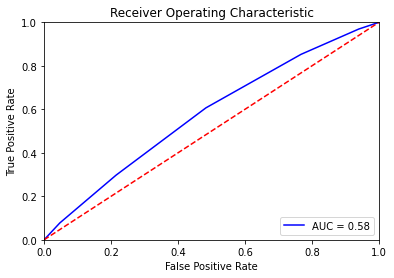

In [ ]:
print("---------------KNN-----------")
knn_clf = KNeighborsClassifier().fit(X_train,y_train)
y_pred = knn_clf.predict(X_test)

print ('Accuracy:', accuracy_score(y_test, y_pred))
print ('Precision Score:', precision_score(y_test, y_pred))
print ('Recall Score:', recall_score(y_test, y_pred, average='macro'))
print ('F1 Score:', f1_score(y_test, y_pred, average='macro'))
knn_f1=f1_score(y_test, y_pred, average='macro')

plot_ROC(knn_clf, X_test, y_test)

In [ ]:
Xp_train, Xp_test, yp_train, yp_test = model_selection.train_test_split(X_pca, y, test_size=0.3, random_state=100)

---------------KNN with PCA-----------
Accuracy: 0.5287539936102237
Precision Score: 0.5517188693659282
Recall Score: 0.5260043346419858
F1 Score: 0.5258363267821553


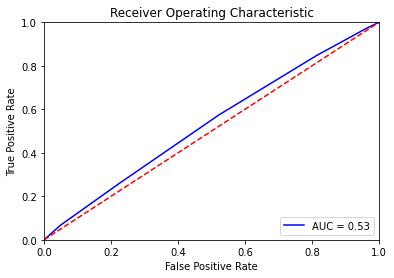

In [ ]:
print("---------------KNN with PCA-----------")
knn_clf = KNeighborsClassifier().fit(Xp_train,yp_train)
yp_pred = knn_clf.predict(Xp_test)

print ('Accuracy:', accuracy_score(yp_test, yp_pred))
print ('Precision Score:', precision_score(yp_test, yp_pred))
print ('Recall Score:', recall_score(yp_test, yp_pred, average='macro'))
print ('F1 Score:', f1_score(yp_test, yp_pred, average='macro'))
knn_pca_f1=f1_score(yp_test, yp_pred, average='macro')

plot_ROC(knn_clf, Xp_test, yp_test)

## Comparing Wrapper result on Linear

In [ ]:
Xw_train, Xw_test, yw_train, yw_test = model_selection.train_test_split(X_wrapper.values, y, test_size=0.3, random_state=100)

---------------KNN with Wrapper-----------
Accuracy: 0.5287539936102237
Precision Score: 0.5835595776772248
Recall Score: 0.5619525960085077
F1 Score: 0.5617805572607831


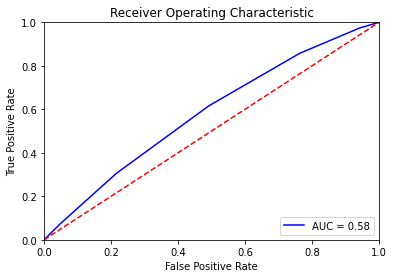

In [ ]:
print("---------------KNN with Wrapper-----------")
knn_clf = KNeighborsClassifier().fit(Xw_train,yw_train)
yw_pred = knn_clf.predict(Xw_test)

print ('Accuracy:', accuracy_score(yw_test, yp_pred))
print ('Precision Score:', precision_score(yw_test, yw_pred))
print ('Recall Score:', recall_score(yw_test, yw_pred, average='macro'))
print ('F1 Score:', f1_score(yw_test, yw_pred, average='macro'))
knn_wrapper_f1=f1_score(yw_test, yw_pred, average='macro')

plot_ROC(knn_clf, Xw_test, yw_test)

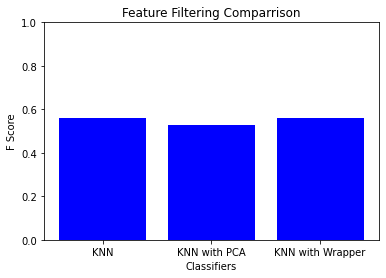

In [ ]:
plt.bar(['KNN','KNN with PCA','KNN with Wrapper'],
        [knn_f1,knn_pca_f1, knn_wrapper_f1], 
        align='center',
        color = 'blue')
plt.title('Feature Filtering Comparrison')
plt.xlabel('Classifiers')
plt.ylabel('F Score')
plt.ylim(0,1)
plt.show()

## Split data into train and test using best feature selection method

In [ ]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_wrapper, y, test_size=0.3, random_state=100)
print("X_train shape:",X_train.shape)
print("y_train shape:",y_train.shape)
print("X_test shape :",X_test.shape)
print("y_test shape :",y_test.shape)

X_train shape: (27750, 10)
y_train shape: (27750,)
X_test shape : (11894, 10)
y_test shape : (11894,)


## Grid Search 

In [ ]:
def knn_param_selection(X, y):
    param_grid = {"n_neighbors" : [20, 30, 40, 50]}
    grid = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid, cv=5)
    grid.fit(X, y)
    print("Best parameters for KNN: ",grid.best_params_)
    return grid.best_params_
    

In [ ]:
best_params_KNN = knn_param_selection(X_train, y_train)

Best parameters for KNN:  {'n_neighbors': 50}


In [ ]:
def rf_param_selection(X, y):
    param_grid = {"n_estimators" : [50, 100, 200, 400],
                  "criterion": ["gini", "entropy"]}

    grid_search = GridSearchCV(RandomForestClassifier(), param_grid=param_grid,cv=5)
    grid_search.fit(X, y)

    print("Best parameters for RF: ",grid_search.best_params_)
    return grid_search.best_params_

In [ ]:
best_tree_RF= rf_param_selection(X_train, y_train)

Best parameters for RF:  {'criterion': 'gini', 'n_estimators': 200}


In [ ]:
def ada_param_selection(X, y):
    
    param_grid = {"n_estimators" : [50, 100, 200, 400]}


    DTC = DecisionTreeClassifier()

    ABC = AdaBoostClassifier(base_estimator = DTC)

    grid_search = GridSearchCV(ABC, param_grid=param_grid,cv=5)
    grid_search.fit(X, y)
    
    print("Best parameters for AdaBoost: ",grid_search.best_params_)
    return grid_search.best_params_

In [ ]:
best_tree_AdaBoost= ada_param_selection(X_train, y_train)

Best parameters for AdaBoost:  {'n_estimators': 200}


In [ ]:
def percep_param_selection(X,y):
    perceptron = Perceptron()
    gridsearch = GridSearchCV(perceptron, {'alpha': [0.001, 0.01, 0.1],
                                                     'max_iter': [16, 32, 64]}, scoring='f1')

    gridsearch.fit(X, y)

    print ("Best params for Perceptron: {}".format(gridsearch.best_params_))
    return gridsearch.best_params_


In [ ]:
best_perc_param = percep_param_selection(X_train,y_train)

Best params for Perceptron: {'alpha': 0.001, 'max_iter': 16}


## Classification Methods

---------------KNN---------------
Accuracy: 0.5892887170001682
Precision Score: 0.6014229708145782
Recall Score: 0.5851068615644422
F1 Score: 0.584514297393213


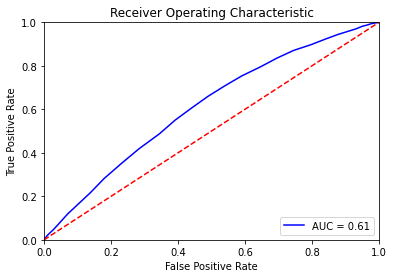

In [ ]:
print("---------------KNN---------------")
knn_clf = KNeighborsClassifier(**best_params_KNN).fit(X_train,y_train)
y_pred = knn_clf.predict(X_test)

print ('Accuracy:', accuracy_score(y_test, y_pred))
print ('Precision Score:', precision_score(y_test, y_pred))
print ('Recall Score:', recall_score(y_test, y_pred, average='macro'))
print ('F1 Score:', f1_score(y_test, y_pred, average='macro'))
knn_f1=f1_score(y_test, y_pred, average='macro')

plot_ROC(knn_clf, X_test, y_test)

---------------Naive Bayes---------------
Accuracy: 0.5649907516394821
Precision Score: 0.6313418681839734
Recall Score: 0.5734123823443783
F1 Score: 0.5589321120380724


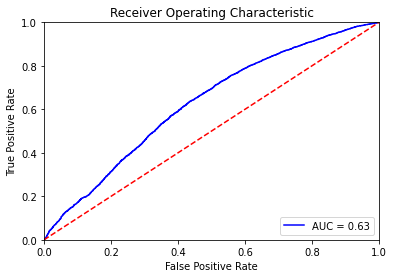

In [ ]:
print("---------------Naive Bayes---------------")
naive_clf = GaussianNB().fit(X_train,y_train)
y_pred = naive_clf.predict(X_test)

print ('Accuracy:', accuracy_score(y_test, y_pred))
print ('Precision Score:', precision_score(y_test, y_pred))
print ('Recall Score:', recall_score(y_test, y_pred, average='macro'))
print ('F1 Score:', f1_score(y_test, y_pred, average='macro'))
naive_f1=f1_score(y_test, y_pred, average='macro')


plot_ROC(naive_clf, X_test, y_test)

---------------Random Forest---------------
Accuracy: 0.6422565999663696
Precision Score: 0.6512460826742277
Recall Score: 0.6391270706810779
F1 Score: 0.6392322812200613


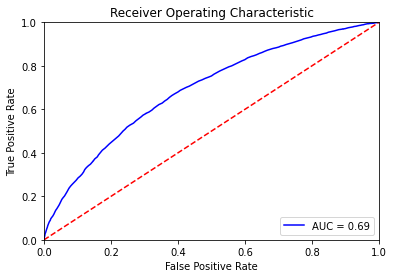

In [ ]:
print("---------------Random Forest---------------")
rf_clf = RandomForestClassifier(**best_tree_RF).fit(X_train,y_train)
y_pred = rf_clf.predict(X_test)

print ('Accuracy:', accuracy_score(y_test, y_pred))
print ('Precision Score:', precision_score(y_test, y_pred))
print ('Recall Score:', recall_score(y_test, y_pred, average='macro'))
print ('F1 Score:', f1_score(y_test, y_pred, average='macro'))
rf_f1=f1_score(y_test, y_pred, average='macro')

plot_ROC(rf_clf, X_test, y_test)   

---------------Ada Boost---------------
Accuracy: 0.6499915923995292
Precision Score: 0.6548297530322957
Recall Score: 0.6462120216763869
F1 Score: 0.6462017961531419


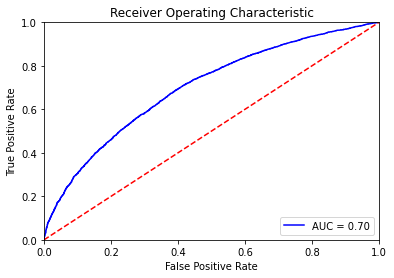

In [ ]:
print("---------------Ada Boost---------------")
ada_clf = AdaBoostClassifier(**best_tree_AdaBoost).fit(X_train,y_train)
y_pred = ada_clf.predict(X_test)

print ('Accuracy:', accuracy_score(y_test, y_pred))
print ('Precision Score:', precision_score(y_test, y_pred))
print ('Recall Score:', recall_score(y_test, y_pred, average='macro'))
print ('F1 Score:', f1_score(y_test, y_pred, average='macro'))
ada_f1=f1_score(y_test, y_pred, average='macro')

plot_ROC(ada_clf, X_test, y_test)

In [ ]:
print("---------------Perceptron---------------")
perc_clf = Perceptron(**best_perc_param).fit(X_train, y_train)
y_pred = perc_clf.predict(X_test)


print ('Accuracy:', accuracy_score(y_test, y_pred))
print ('Precision Score:', precision_score(y_test, y_pred, average='weighted', labels=np.unique(y_pred)))
print ('Recall Score:', recall_score(y_test, y_pred, average='weighted', labels=np.unique(y_pred)))
print ('F1 Score:', f1_score(y_test, y_pred, average='weighted', labels=np.unique(y_pred)))
real_perc_f1=f1_score(y_test, y_pred,  average='weighted', labels=np.unique(y_pred))


---------------Perceptron---------------
Accuracy: 0.4846140911383891
Precision Score: 0.5332836235515442
Recall Score: 0.4846140911383891
F1 Score: 0.37523302049460916


**Custom Perceptron**

In [ ]:
def evaluate_algorithm(train_set, test_set ,algorithm, *args):
    predicted = algorithm(train_set, test_set, *args)
    actual = [row[-1] for row in test_set]
    accuracy =  accuracy_score(actual, predicted)
    precision = precision_score(actual, predicted)
    recall = recall_score(actual, predicted)
    f1=f1_score(actual, predicted)
    
    fpr, tpr, threshold = metrics.roc_curve(actual, predicted)
    roc_auc = metrics.auc(fpr, tpr)
    
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
        
    return accuracy,precision,recall,f1
 
# Make a prediction with weights
def predict(row, weights):
    activation = weights[0] #İlk ağırlık biastır. Herhangi bir inputtan sorumlu değil.
    for i in range(len(row)-1):
        activation += weights[i + 1] * row[i] #activation = (w1 * X1) + (w2 * X2)+... + bias
    return 1.0 if activation >= 0.0 else 0.0
 
# Estimate Perceptron weights using stochastic gradient descent
def train_weights(train, l_rate, n_epoch):
    weights = [0.0 for i in range(len(train[0]))]
    for epoch in range(n_epoch):
        for row in train:
            prediction = predict(row, weights)
            error = row[-1] - prediction
            weights[0] = weights[0] + l_rate * error #biası güncelle
            for i in range(len(row)-1):
                weights[i + 1] = weights[i + 1] + l_rate * error * row[i] #her bir satıra ait ağırlıkları güncelle
    return weights
 
# Perceptron Algorithm With Stochastic Gradient Descent
def perceptron(train, test, l_rate, n_epoch):
    predictions = list()
    weights = train_weights(train, l_rate, n_epoch)
    for row in test:
        prediction = predict(row, weights)
        predictions.append(prediction)
    return(predictions)

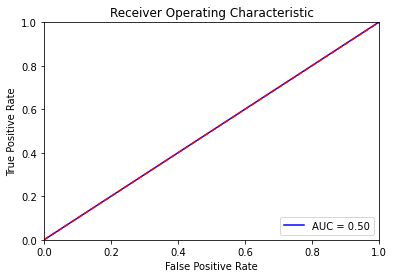

In [ ]:
train_set = np.column_stack((X_train,y_train))
test_set = np.column_stack((X_test,y_test))
# evaluate algorithm
l_rate = best_perc_param['alpha']
n_epoch = best_perc_param['max_iter']
accuracy,precision,recall,percep_f1= evaluate_algorithm(train_set, test_set, perceptron, l_rate, n_epoch)

In [ ]:
print("------Custom Perceptron------------")
print('Accuracy: %s' % accuracy)
print('Precision: %s' % precision)
print('Recall: %s' % recall)
print('F1: %s' % percep_f1)

------Custom Perceptron------------
Accuracy: 0.5285858416008071
Precision: 0.5284258401414975
Recall: 0.9987265202164916
F1: 0.6911594602038006


## Compare models

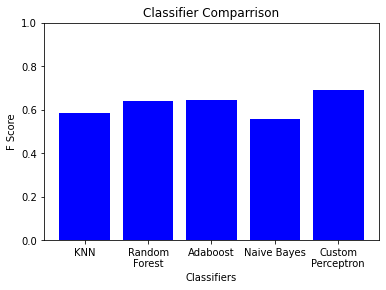

In [ ]:
plt.bar(['KNN','Random\nForest','Adaboost','Naive Bayes','Custom\nPerceptron'],
        [knn_f1,rf_f1,ada_f1,naive_f1,percep_f1], 
        align='center',
        color = 'blue')
plt.title('Classifier Comparrison')
plt.xlabel('Classifiers')
plt.ylabel('F Score')
plt.ylim(0,1)
plt.show()

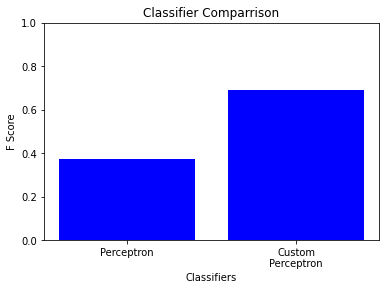

In [ ]:
plt.bar(['Perceptron','Custom\nPerceptron'],
        [real_perc_f1,percep_f1], 
        align='center',
        color = 'blue')
plt.title('Classifier Comparrison')
plt.xlabel('Classifiers')
plt.ylabel('F Score')
plt.ylim(0,1)
plt.show()